In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lmosser\Anaconda\lib\site-packages\matplotlib\transforms.py:1611: RuntimeWarning: invalid value encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())


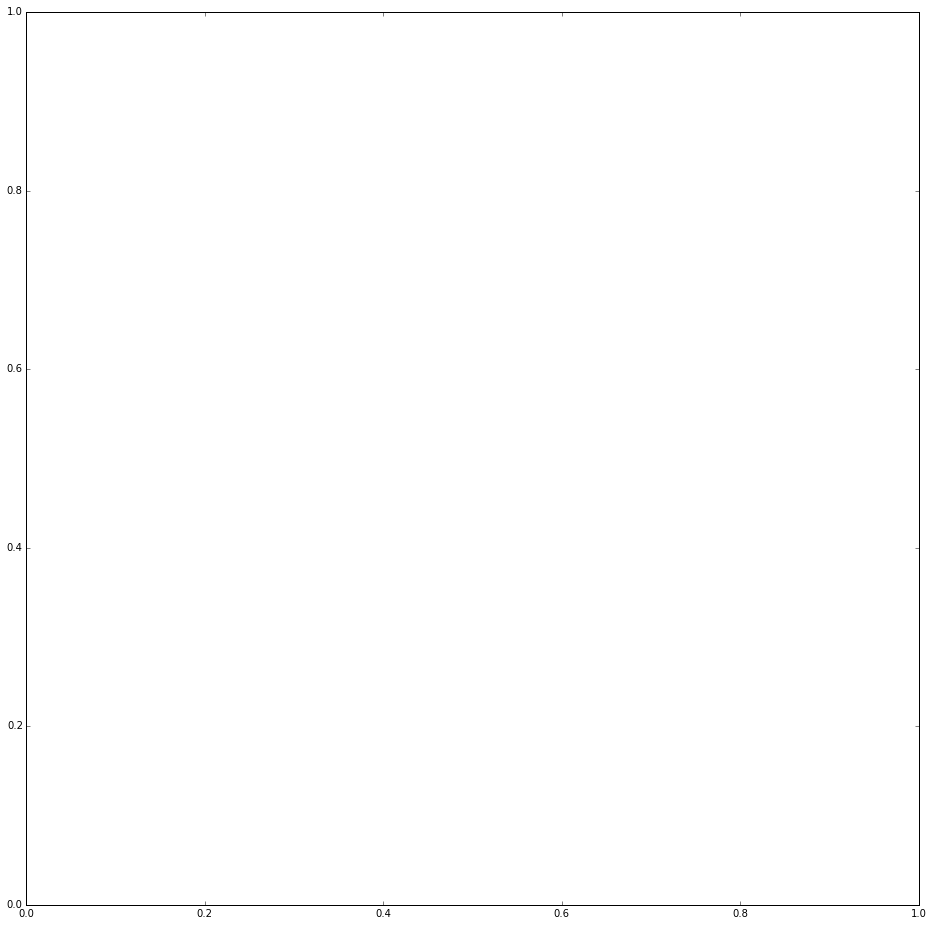

In [2]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

plt.show()